EXPLORATORY DATA ANALYSIS(EDA) FOR RAW DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tamil_nadu_rural_bus_dataset_enriched_100k.csv to tamil_nadu_rural_bus_dataset_enriched_100k.csv


In [ ]:
df_raw = pd.read_csv("tamil_nadu_rural_bus_dataset_enriched_100k.csv")

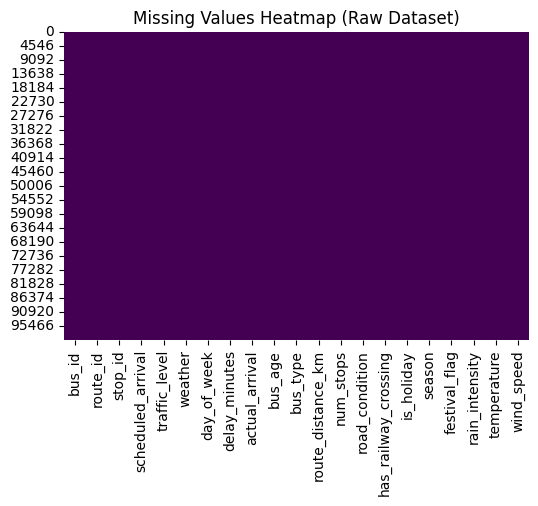

In [ ]:
# =============================
# 1. Missing Values Heatmap
# =============================
plt.figure(figsize=(6,4))
sns.heatmap(df_raw.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Raw Dataset)")
plt.show()

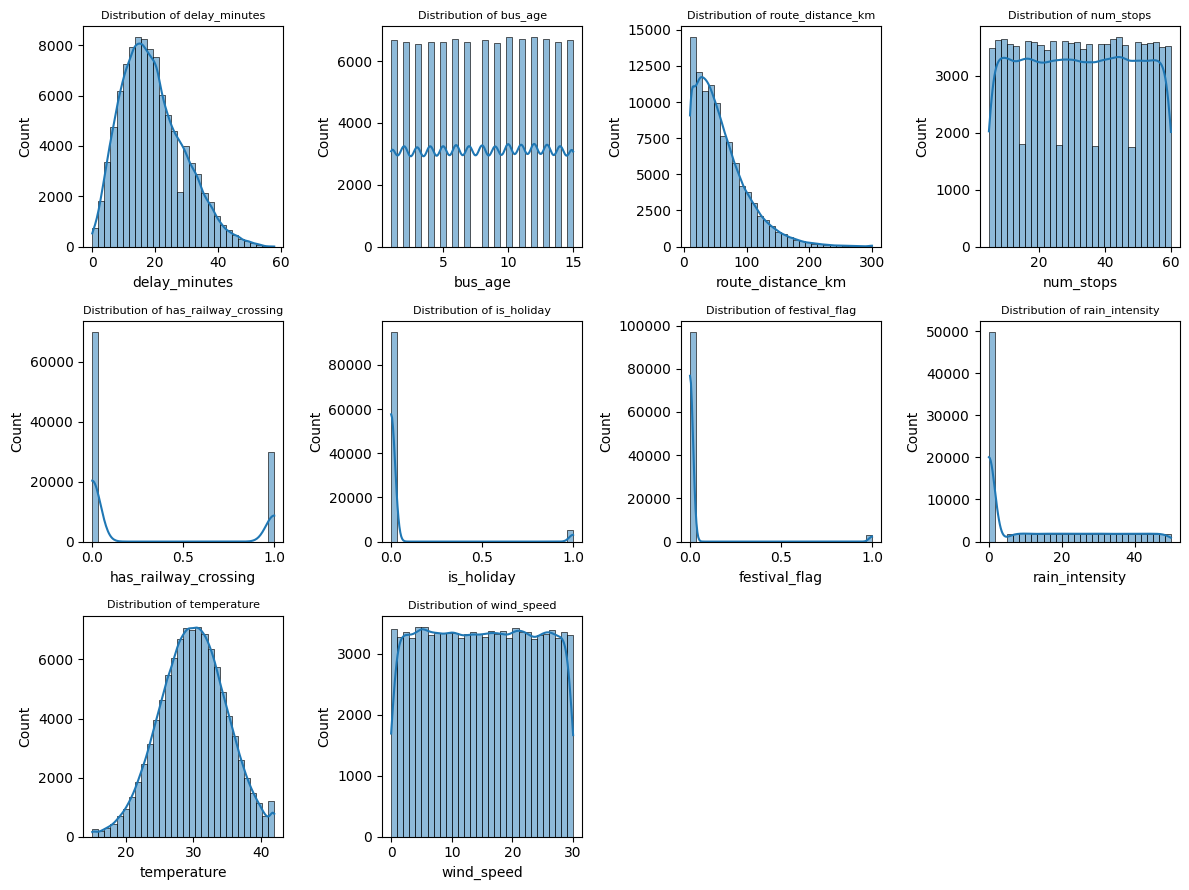

In [ ]:
# =============================
# 2. Distributions of Numerical Columns
# =============================
num_cols = df_raw.select_dtypes(include=[np.number]).columns

# Setup grid: 4 plots per row
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df_raw[col].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=8)

# Remove extra axes if number of plots < grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


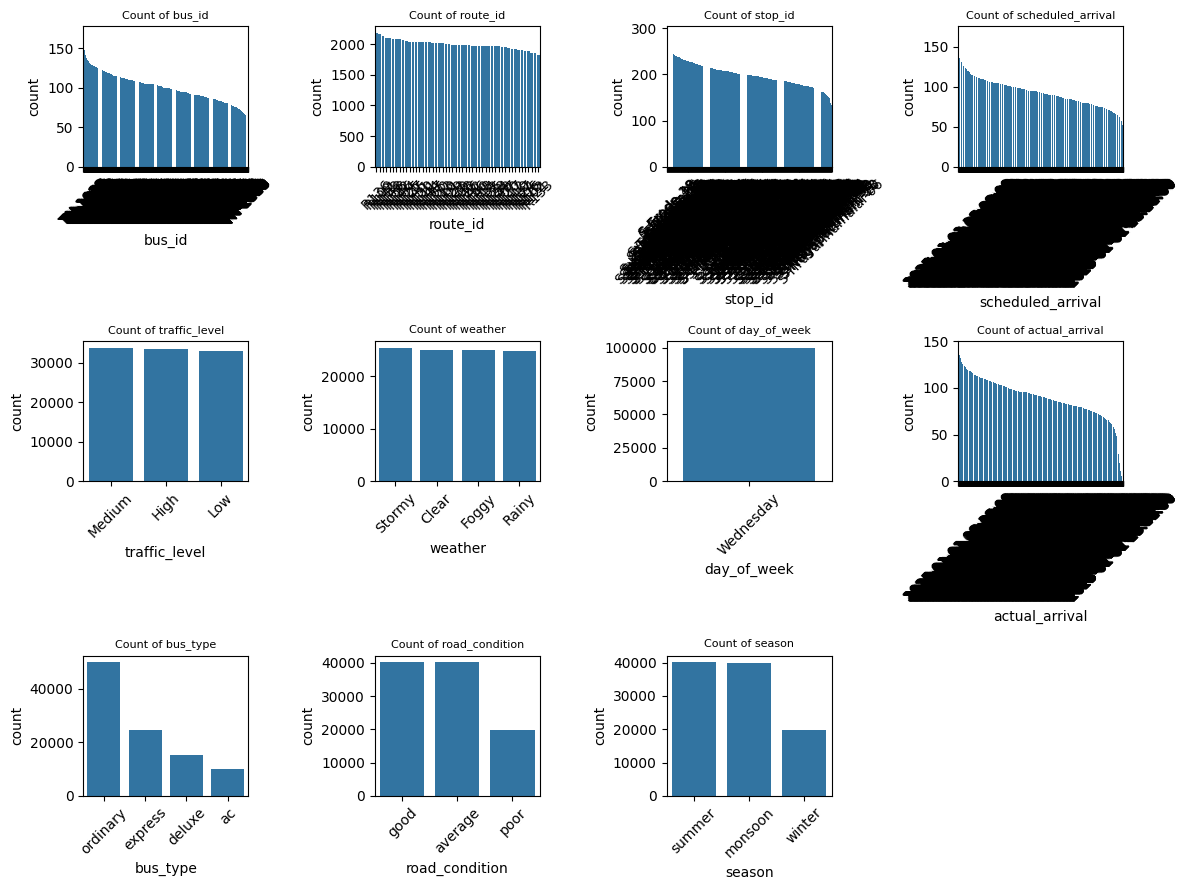

In [ ]:
# =============================
# 3. Count Plots for Categorical Columns
# =============================
cat_cols = df_raw.select_dtypes(include=['object']).columns

# Setup grid: 4 plots per row
n_cols = 4
n_rows = int(np.ceil(len(cat_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_raw, x=col, order=df_raw[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Count of {col}", fontsize=8)
    axes[i].tick_params(axis="x", rotation=45)

# Remove extra axes if number of plots < grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


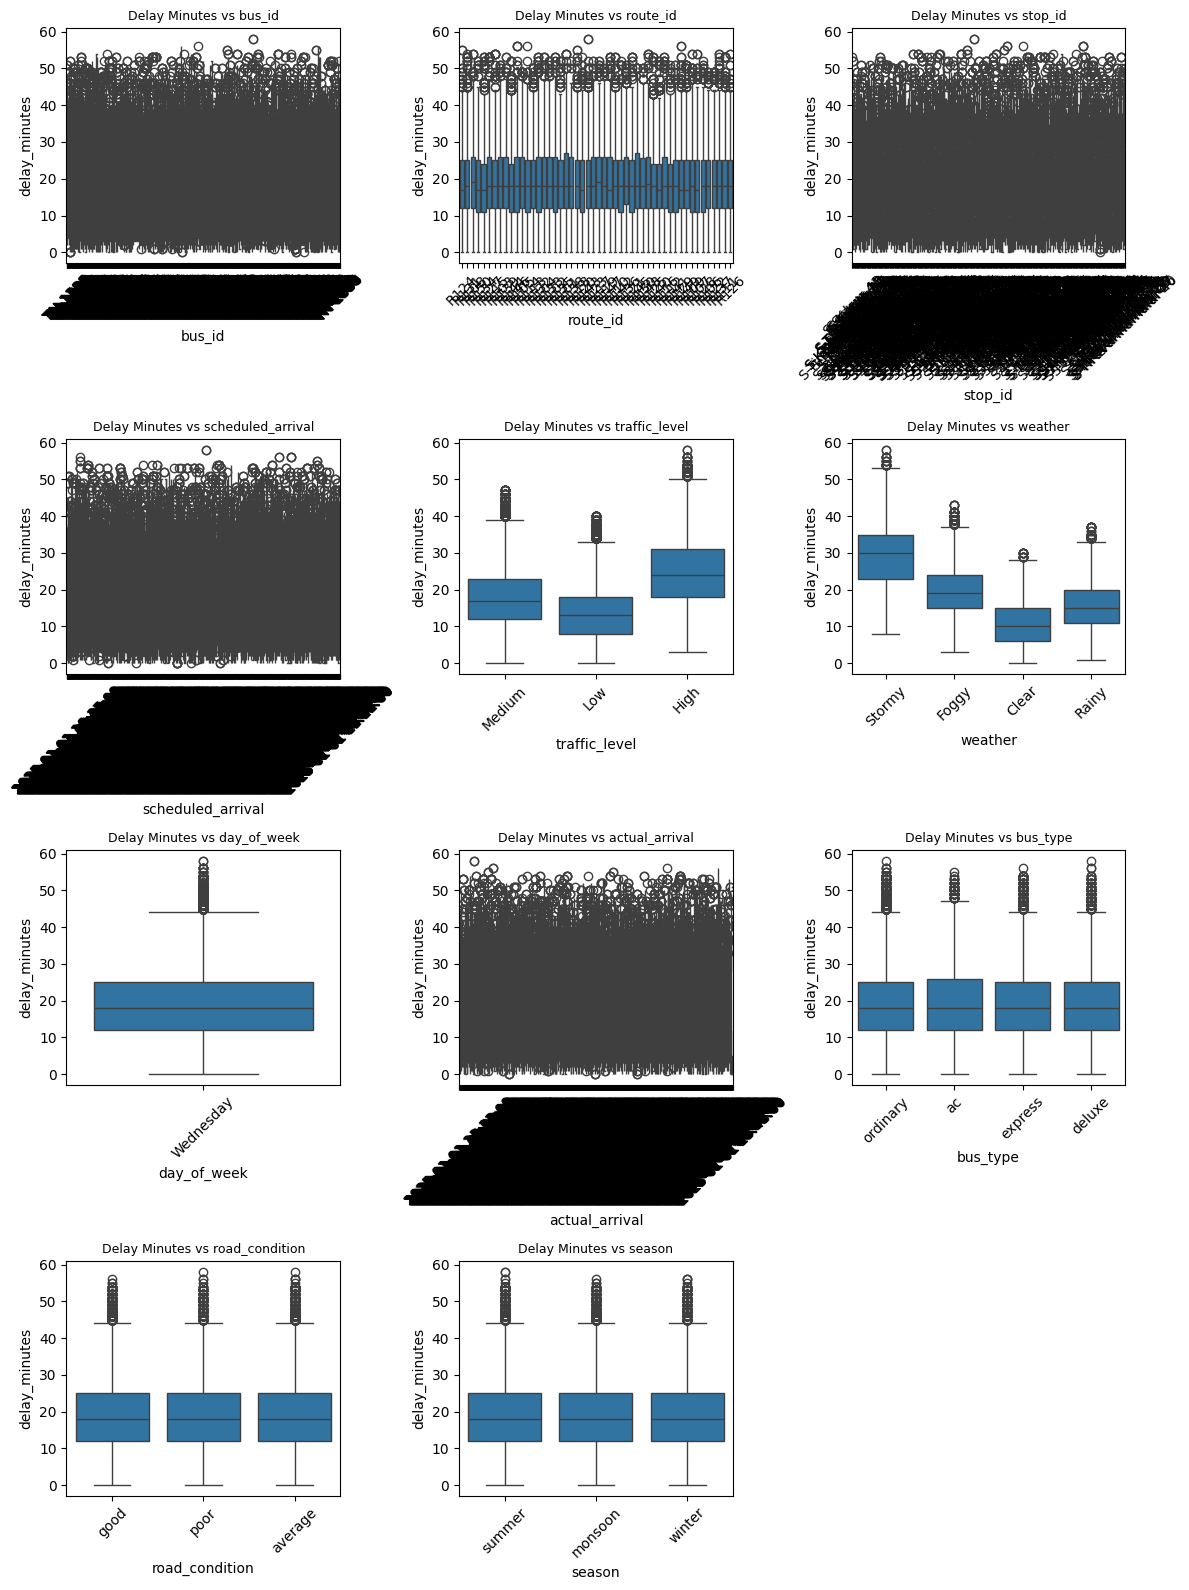

In [ ]:
# =============================
# 4. Boxplots: Delay vs Categorical
# =============================
if "delay_minutes" in df_raw.columns:
    n_cols = 3   # 4 plots per row
    n_rows = int(np.ceil(len(cat_cols) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.boxplot(data=df_raw, x=col, y="delay_minutes", ax=axes[i])
        axes[i].set_title(f"Delay Minutes vs {col}", fontsize=9)
        axes[i].tick_params(axis="x", rotation=45)

    # Remove empty subplots if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


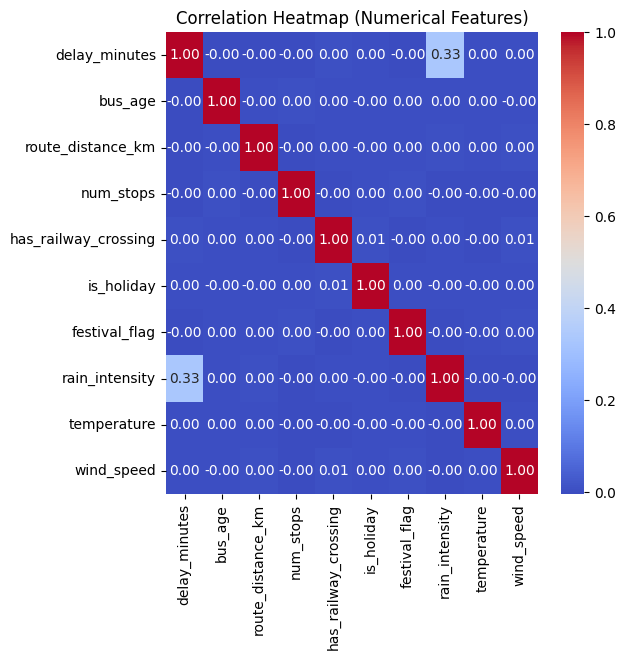

In [ ]:
# =============================
# 5. Correlation Heatmap (Numerical Features)
# =============================
plt.figure(figsize=(6,6))
sns.heatmap(df_raw[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()